# Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from ydata_profiling import ProfileReport

%matplotlib inline

# Load data set

In [2]:
# Define path to file
file_path = Path("Aemf1.csv")

# Load the CSV
data = pd.read_csv(file_path)

# Functions

In [3]:
# function to print info of a column
def print_NA_info(df: pd.DataFrame, feature:str) -> None:
    print(f"Number of unique values: {len(df[feature].unique())}")
    print(f"Unique values: {df[feature].unique()}")
    print(f"Shape train data: {df.shape}")
    na_per = ((df[feature].isna().sum() / len(df[feature])) * 100).round(2)
    print(f"The percentage of NA is: {na_per}%", end="\n\n")
    ##
    print(
        df
        .groupby(feature)[feature]
        .count()
    )

# Display first rows

In [4]:
data.iloc[:, :11].head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0


In [5]:
data.iloc[:, 11:].head()

,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


# Describe

In [6]:
data.iloc[:, :13].describe()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,0.295273,0.341180,9.442274,93.103179,1.165939
std,279.408493,1.299459,0.456171,0.474112,0.889173,8.141745,0.638157
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000
25%,144.016085,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000
50%,203.819274,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000
75%,297.373358,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000


In [7]:
data.iloc[:, 13:].describe()

,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


# Info

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

# Create report

In [9]:
profile = ProfileReport(data, title="Profiling Report")

In [10]:
# profile.to_notebook_iframe()
# profile.to_widgets()
profile.to_file("report.html")

Summarize dataset:  81%|████████  | 21/26 [00:00<00:00, 46.87it/s, Calculate auto correlation]                   c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Amsterdam'')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 55.54it/s]


# Feature selection

### Price

In [11]:
threshold_1 = 1000
threshold_2 = 800 

n_above_limit_1 = np.sum(data["Price"] > threshold_1)
n_above_limit_2 = np.sum(data["Price"] > threshold_2)

len_price = len(data.Price)

percent_excluded_1 = round((n_above_limit_1 / len_price) * 100, 2)
percent_excluded_2 = round((n_above_limit_2 / len_price) * 100, 2)

print(f"Lenght price: {len_price}")
print(f"N price above {threshold_1}: {n_above_limit_1}")
print(f"percentage excluded: {percent_excluded_1} (with a limit of {threshold_1})")
print(f"N price above {threshold_2}: {n_above_limit_2}")
print(f"percentage excluded: {percent_excluded_2} (with a limit of {threshold_2})")

Lenght price: 41714
N price above 1000: 476
percentage excluded: 1.14 (with a limit of 1000)
N price above 800: 904
percentage excluded: 2.17 (with a limit of 800)


In [12]:
# Filter the dataset
filtered_data_1 = data[data["Price"] < threshold_1]
filtered_data_2 = data[data["Price"] < threshold_2]

c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

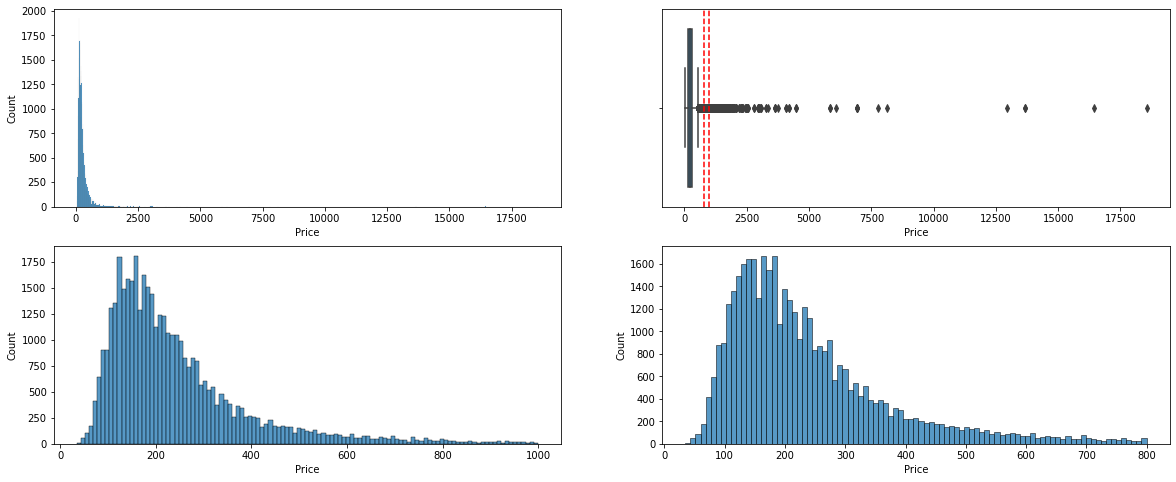

In [13]:
plt.figure(figsize=(20, 8))

plt.subplot(2, 2, 1)
sns.histplot(data, x="Price")

plt.subplot(2, 2, 2)
sns.boxplot(x="Price", data=data)
plt.axvline(x=threshold_1, color="red", linestyle="--")
plt.axvline(x=threshold_2, color="red", linestyle="--")

plt.subplot(2, 2, 3)
sns.histplot(filtered_data_1, x="Price")

plt.subplot(2, 2, 4)
sns.histplot(filtered_data_2, x="Price")


I filter the rows with `Price` above 800€

In [14]:
selected_threshold = 800 

data_new = data[data["Price"] < selected_threshold]

nrow_data = len(data.Price)
nrow_data_new = len(data_new.Price)

percent_included = round((nrow_data_new / nrow_data) * 100, 2)

print(f"nrows original dataset: {len(data.Price)}")
print(f"nrows new dataset:      {len(data_new.Price)}")
print(f"N rows with price above {selected_threshold}€: {np.sum(data['Price'] > selected_threshold)}")
print(f"percentage included data: {percent_included} (with a limit of {selected_threshold}€)")

nrows original dataset: 41714
nrows new dataset:      40810
N rows with price above 800€: 904
percentage included data: 97.83 (with a limit of 800€)


## Room Type

In [15]:
print_NA_info(data_new, "Room Type")

Number of unique values: 3
Unique values: ['Private room' 'Entire home/apt' 'Shared room']
Shape train data: (40810, 19)
The percentage of NA is: 0.0%

Room Type
Entire home/apt    27455
Private room       13039
Shared room          316
Name: Room Type, dtype: int64


In [16]:
categories_to_include = ["Entire home/apt", "Private room"]

data_new = data_new[data_new["Room Type"].isin(categories_to_include)]

## Private Room

In [17]:
pd.crosstab(data_new["Room Type"], data_new["Private Room"], rownames=["Room Type"], colnames=["Private Room"], margins=False)

Private Room,False,True
Room Type,,
Entire home/apt,27455,0
Private room,0,13039


## Cleanliness Rating

In [18]:
conditions = [
    data_new["Cleanliness Rating"] <= 8,
    data_new["Cleanliness Rating"] == 9,
    data_new["Cleanliness Rating"] == 10
]
choices = [
    "1-8",
    "9",
    "10"
]

# Apply numpy select
data_new["Cleanliness Rating Cat"] = np.select(conditions, choices, default="Undefined")

c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


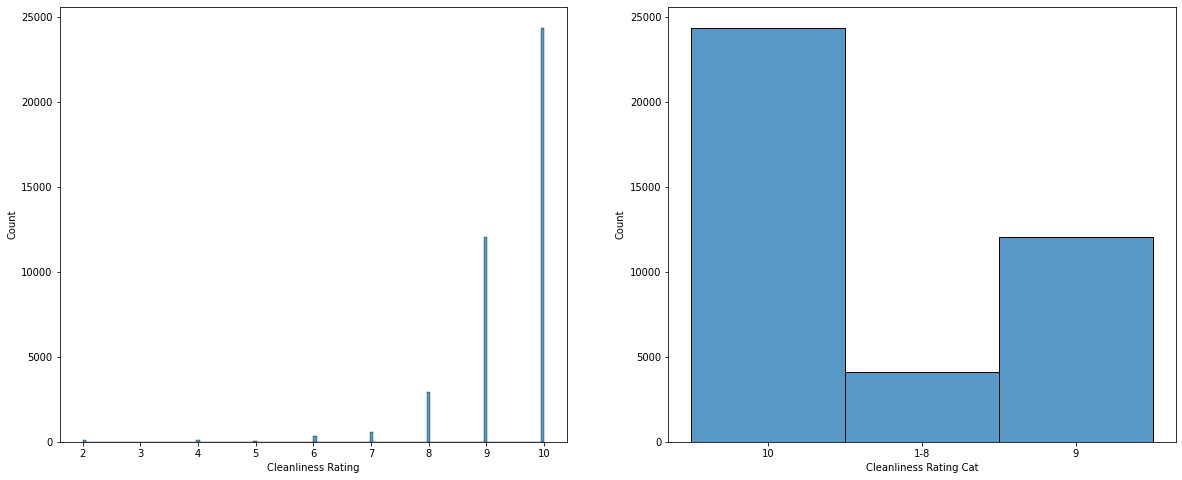

In [19]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(data_new, x="Cleanliness Rating")

plt.subplot(1, 2, 2)
sns.histplot(data_new, x="Cleanliness Rating Cat")

plt.show()

## Guest Satisfaction

In [20]:
conditions = [
    data_new["Guest Satisfaction"] <= 80,
    (data_new["Guest Satisfaction"] > 80) & (data_new["Guest Satisfaction"] <= 90),
    (data_new["Guest Satisfaction"] > 90) & (data_new["Guest Satisfaction"] <= 95),
    (data_new["Guest Satisfaction"] > 95) & (data_new["Guest Satisfaction"] <= 98),
    data_new["Guest Satisfaction"] > 98
]
choices = [
    "1-80",
    "81-90",
    "91-95",
    "95-98",
    "98-100"
]

# Apply numpy select
data_new["Guest Satisfaction Cat"] = np.select(conditions, choices, default="Undefined")

c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


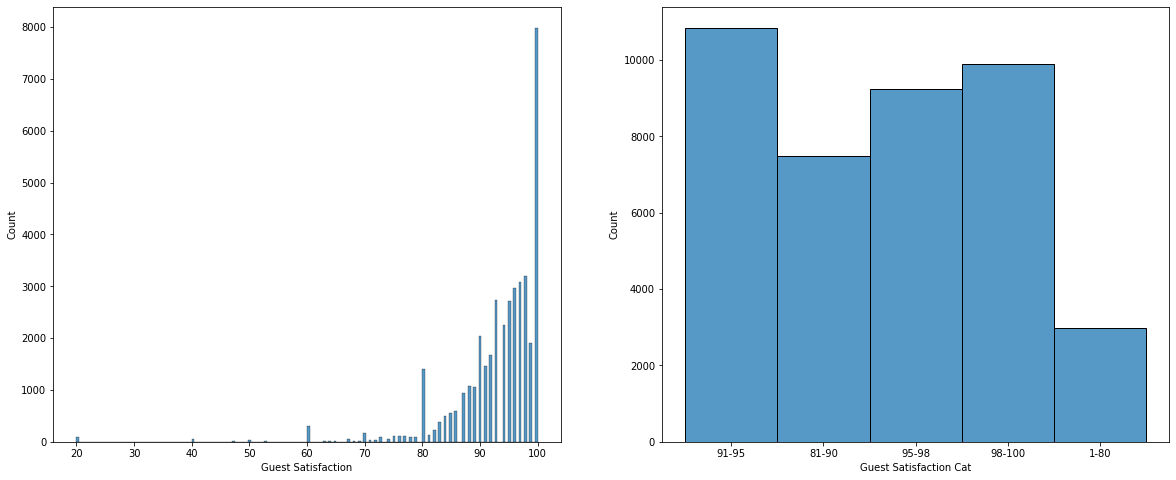

In [21]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(data_new, x="Guest Satisfaction")

plt.subplot(1, 2, 2)
sns.histplot(data_new, x="Guest Satisfaction Cat")

plt.show()

## Bedrooms

In [22]:
conditions = [
    data_new["Bedrooms"] == 0,
    data_new["Bedrooms"] == 1,
    data_new["Bedrooms"] == 2,
    data_new["Bedrooms"] > 2
]
choices = [
    "0",
    "1",
    "2",
    "3+"
]

# Apply numpy select
data_new["Bedrooms Cat"] = np.select(conditions, choices, default="Undefined")

c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


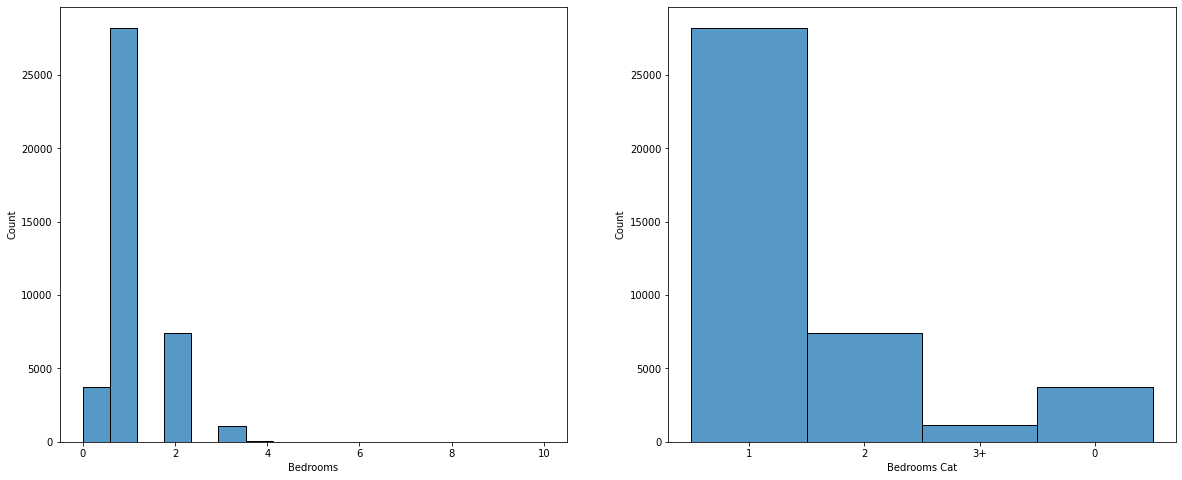

In [23]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(data_new, x="Bedrooms")

plt.subplot(1, 2, 2)
sns.histplot(data_new, x="Bedrooms Cat")

plt.show()

# Conclusions

The features were selected based on the plots above and on the report generated with `ProfileReport`.

**Excluded Features**:
- `Shared Room` (highly imbalanced)
- `Private Room` (superfluous, already coded in `Room Type`)

**Included (transformed)**:
- `Price` (only `Price < 800€`)
- `Room Type` (only `Entire home/apt` and `Private room`)
- `Cleanliness Rating Cat` (categorical version of `Cleanliness Rating` with categories "1-8", "9", "10")
- `Guest Satisfaction Cat` (categorical version of `Guest Satisfaction` with categories "1-80", "81-90", "91-95", "95-98", "98-100")
- `Bedrooms Cat` (categorical version of `Bedrooms` with categories "0", "1", "2", "3+")

**Included Features**:
- `City`
- `Day`
- `Person Capacity`
- `Superhost`
- `Multiple Rooms`
- `Business`
- `Cleanliness Rating`
- `Guest Satisfaction`
- `Bedrooms`
- `City Center (km)`
- `Metro Distance (km)`
- `Attraction Index`
- `Normalised Attraction Index`
- `Restraunt Index`
- `Normalised Restraunt Index`



In [24]:
data_new.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index', 'Cleanliness Rating Cat',
       'Guest Satisfaction Cat', 'Bedrooms Cat'],
      dtype='object')

In [25]:
selected_features = [
    "City", "Price", "Day", "Room Type", 
    "Person Capacity", "Superhost", "Multiple Rooms", "Business",
    "Cleanliness Rating", "Guest Satisfaction", "Bedrooms",
    "City Center (km)", "Metro Distance (km)", "Attraction Index",
    "Normalised Attraction Index", "Restraunt Index",
    "Normalised Restraunt Index", "Cleanliness Rating Cat",
    "Guest Satisfaction Cat", "Bedrooms Cat"
]

In [26]:
data_to_csv = data_new[selected_features]

In [27]:
# Add a Country column with country values for each city
country_mapping = {
    "Amsterdam": "Netherlands",
    "Athens": "Greece",
    "Barcelona": "Spain",
    "Berlin": "Germany",
    "Budapest": "Hungary",
    "Lisbon": "Portugal",
    "Paris": "France",
    "Rome": "Italy",
    "Vienna": "Austria"
}

# Apply the country mapping to the dataset
data_to_csv["Country"] = data_to_csv["City"].map(country_mapping)

C:\Users\danie\AppData\Local\Temp\ipykernel_4984\496693536.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_csv["Country"] = data_to_csv["City"].map(country_mapping)


In [28]:
data_to_csv.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Person Capacity', 'Superhost',
       'Multiple Rooms', 'Business', 'Cleanliness Rating',
       'Guest Satisfaction', 'Bedrooms', 'City Center (km)',
       'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index', 'Cleanliness Rating Cat',
       'Guest Satisfaction Cat', 'Bedrooms Cat', 'Country'],
      dtype='object')

In [29]:
data_to_csv.to_csv("airbnb_dataset.csv", index=False)

# Create report for selected features

In [30]:
profile_sf = ProfileReport(data_to_csv, title="Profiling Report for Selected Features")

In [31]:
profile_sf.to_file("report_selected_features.html")

c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)
Summarize dataset:  82%|████████▏ | 23/28 [00:00<00:00, 14.70it/s, Calculate auto correlation]                   c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not conver